---


---

# Hockey Teams Data : Exploratory Data Analysis

## Introduction

Within this notebook, our primary objective revolves around the acquisition, refinement, and enhancement of a raw dataset sourced from the website [Hockey Team Stats](https://www.scrapethissite.com/). 

The overarching purpose of this notebook is to conduct an exploratory data analysis (EDA) on the unprocessed dataset, with the ultimate goal of preparing it for subsequent analytical and visualization endeavors. The dataset in question provides a comprehensive array of statistics pertaining to hockey teams, encompassing details such as:

- Team names
- Total matches played
- Total wins
- Win percentages
- Total losses
- Overtime losses
- Goals given
- Goals taken
- Goal differentials

The scope of our data refinement operations entails an in-depth review of the dataset, where we meticulously identify and address any anomalies or irregularities.

This process extends to the transformation of data types, the introduction of a customized index, and any other necessary data modifications that may be deemed essential.

Upon the successful completion of these data preparation tasks, our final step involves the validation of the refined dataset, thus rendering it primed and ready for subsequent in-depth analysis and compelling data visualizations.

## Imports & Setup

### Module Import & Setup



In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Library Setup
pd.options.display.precision = 5
warnings.filterwarnings("ignore")

In [2]:
# Adds utils directory to Python path
import sys
sys.path.append("../")

In [3]:
# Import utility functions
from utils import df_info_util as diu
from utils import common_util as cu

### Data Import

Now, we will be importing the scraped hockey stats dataset from the directory using the `pandas` library.<br>
The `read_csv()` method is used to get the data from the CSV file. Moreover, we'll making a deep copy of the dataframe for working.

In [4]:
# import data from csv
file_path = "../data/raw/hockey_teams_raw.csv"
hockey_df_main = pd.read_csv(file_path, index_col=False)

# create a copy of it for working
hockey_df  = hockey_df_main.copy(deep=True)

# view the glimpse of the dataframe
hockey_df.head()

,team_name,year,wins,losses,ot_losses,win_pct,goals_for,goals_against,goals_diff,scrape_timestamp
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35,2023-10-20 01:26:07
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14,2023-10-20 01:26:07
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81,2023-10-20 01:26:07
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73,2023-10-20 01:26:07
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25,2023-10-20 01:26:07


In [5]:
# columns in the data
hockey_df.columns.tolist()

['team_name',
 'year',
 'wins',
 'losses',
 'ot_losses',
 'win_pct',
 'goals_for',
 'goals_against',
 'goals_diff',
 'scrape_timestamp']

### Metadata Information

In this section, we'll be describing each field present in our dataset, providing insight into the information contained within each field. This information is crucial in helping us understand the structure of our data, and ensuring that we are able to effectively clean and transform it in preparation for analysis and visualization. Here's a breakdown of the fields contained within our dataset:

- **team_name**: The name of the hockey team.
- **year**: The year for the statistics.
- **wins**: The number of games won.
- **losses**: The number of games lost.
- **ot_losses**: The number of overtime losses.
- **win_pct**: The winning percentage.
- **goals_for**: The total number of goals scored by the team.
- **goals_against**: The total number of goals conceded by the team.
- **goals_diff**: The goal differential (goals for - goals against).
- **scrape_timestamp**: The timestamp (UTC) of when the data was scraped.

💡 **Insights:**

The `scrape_timestamp` field is not required for analysis, so, we can remove it

In [6]:
# Drop the "scrape_timestamp" column
hockey_df = hockey_df.drop(columns="scrape_timestamp")

# View glimpse of the data
hockey_df.head()

,team_name,year,wins,losses,ot_losses,win_pct,goals_for,goals_against,goals_diff
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25


## Data Structure Analysis

This section is devoted to an initial exploration of the structure of our dataframe. Our focus will be on various aspects of the dataframe, such as the number of columns, presence of null values, shape, and attributes of the individual fields within the dataframe. The goal of this analysis is to identify any potential challenges or issues that may arise during further analysis.

We can break down our exploration into two parts:

- **Dataframe Overview**: To gain an understanding of overall dataframe attributes
- **Field Attributes**: To examine the attributes of individual fields within the dataframe

With this framework in mind, let's proceed with a closer look at the structure of our dataframe.

### Dataframe Details

This section is a crucial one and it provides a high-level overview of the dataframe being analyzed. This section includes important information about the size and structure of the data, as well as any missing or null values in the data. The details of the dataframe that we'll get are as follows:

- **Dimensions**: The number of rows and columns in the dataframe.
- **Shape**: The shape of the dataframe, represented as a tuple (rows, columns).
- **Row Count**: The number of rows in the dataframe.
- **Column Count**: The number of columns in the dataframe.
- **Total Datapoints**: The total number of data points in the dataframe, calculated as the number of rows multiplied by the number of columns.
- **Null Datapoints**: The number of missing or null values in the dataframe.
- **Non-Null Datapoints**: The number of non-missing or non-null values in the dataframe.
- **Total Memory Usage**: The total memory usage of the dataframe, represented in bytes.
- **Average Memory Usage**: The average memory usage of each data point in the dataframe, represented in bytes.

This section provides a quick reference for the dataframe, and helps to identify any potential issues with the data that may need to be addressed in the cleaning process. By having a clear and concise overview of the dataframe, it's easier to move forward with the data cleaning and analysis process.

In [7]:
# Get the dataframe structure details
df_structure = diu.dataframe_structure(dataframe=hockey_df)

# Prettify the dictionary response
tbl = cu.dict_to_table(input_dict=df_structure,
                    column_headers=["Dataframe Attributes", "Value"])

# Show table
print(tbl)

+----------------------+----------+
| Dataframe Attributes | Value    |
+----------------------+----------+
| Dimensions           | 2        |
| Shape                | (582, 9) |
| Row Count            | 582      |
| Column Count         | 9        |
| Total Datapoints     | 5238     |
| Null Datapoints      | 224      |
| Non-Null Datapoints  | 5014     |
| Total Memory Usage   | 80283    |
| Average Memory Usage | 8028.0   |
+----------------------+----------+


💡 **Insights:**

The dataframe has $2$ dimensions and a shape of ($582$, $9$), meaning it has $582$ rows and $9$ columns.<br>
The dataframe has a total of $5,238$ data points, with $224$ null data points. The total memory usage of the dataframe is $80,283$ bytes and the average memory usage per column is $8,028$ bytes.

### Field Details

This section provides a detailed view of the columns in the dataframe, and includes important information that can help with the data cleaning and analysis process. This section is typically used to get an understanding of the data types and distributions of the columns, and to identify any missing or null values that may need to be addressed.

We can use the `info()` method in `pandas` to quickly get an understanding of the structure and distribution of the data, and identify any issues that may need to be addressed in the cleaning process.

Additionally, we'll use the function `diu.datatype_details()` to get a datatype details of the dataframe.

Some of the key information that we'll get from this section are as follows:

- **Column Names**: A list of the names of all the columns in the dataframe, which can help you to identify any columns that may need to be renamed for clarity or consistency.
- **Data types**: The datatype of each column in the dataframe, such as integer, float, string, etc. The datatype information is important because it determines how the data can be analyzed and manipulated.
- **Non-Null Count**: The number of non-null or non-missing values for each column in the dataframe. This information can help you to determine if there are any columns that have a high percentage of missing values, which may need to be handled differently in the cleaning process.
- **Null Count**: The number of null or missing values for each column in the dataframe. This information can help you to determine if there are any columns that have a high number of missing values, which may need to be handled differently in the cleaning process.
- **Memory Usage**: The memory usage of each column in the dataframe, represented in bytes. This information can be useful in determining if there are any columns that are using a large amount of memory, which may need to be optimized for performance.

In [8]:
# Get field details
hockey_df.info(memory_usage ='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team_name      582 non-null    object 
 1   year           582 non-null    int64  
 2   wins           582 non-null    int64  
 3   losses         582 non-null    int64  
 4   ot_losses      358 non-null    float64
 5   win_pct        582 non-null    float64
 6   goals_for      582 non-null    int64  
 7   goals_against  582 non-null    int64  
 8   goals_diff     582 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 78.4 KB


In [9]:
# Get details of the datatypes
diu.datatype_details(hockey_df)

There are 1 fields with object datatype
There are 2 fields with float64 datatype
There are 6 fields with int64 datatype


💡 **Insight:**

Based on the above results, it appears that the dataframe has $8$ columns and only `ot_losses` column have missing values.

We also found that our dataset has $6$ integer type data field, $2$ float and $1$ object type data field. The `year` is actually a categorical field but, comes as integer datatype.

Based on our findings, we need to perform the following steps:
- Fill the missing values in `ot_losses` column with zeros
- Change the datatype of `ot_losses` from float to integer
- Change the datatype of `year` from integer to object

In [10]:
# Applying necessary transformation
hockey_df = (
    hockey_df.pipe(lambda x: x.fillna(0) if "ot_losses" in x.columns else x) # Fill missing values
    .pipe(lambda x: x.astype({"ot_losses": int, "year": str})) # Change datatype 
)

# View glimpse of the data
hockey_df.head()


,team_name,year,wins,losses,ot_losses,win_pct,goals_for,goals_against,goals_diff
0,Boston Bruins,1990,44,24,0,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,0,0.388,292,278,14
2,Calgary Flames,1990,46,26,0,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,0,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,0,0.425,273,298,-25


In [11]:
# Get field details
hockey_df.info(memory_usage ='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team_name      582 non-null    object 
 1   year           582 non-null    object 
 2   wins           582 non-null    int64  
 3   losses         582 non-null    int64  
 4   ot_losses      582 non-null    int32  
 5   win_pct        582 non-null    float64
 6   goals_for      582 non-null    int64  
 7   goals_against  582 non-null    int64  
 8   goals_diff     582 non-null    int64  
dtypes: float64(1), int32(1), int64(5), object(2)
memory usage: 106.3 KB


💡 **Insight:**

We can see that post transformation, we don't have any missing values in the dataset and the data type of the columns are also appropriate. This is a positive indication that the data is relatively clean and ready for further analysis.

However, it is always good to double check the data and perform some exploratory data analysis to make sure that there are no other issues with the data.

## Data Quality Analysis

The purpose of this section is to evaluate the overall quality of the data by checking for any missing or null values, duplicate entries, and any other potential issues that may impact the accuracy or reliability of our analysis. 

This step is crucial in ensuring that the data we are working with is valid and can be used to draw meaningful conclusions. We will also be identifying and addressing any issues that are found, in order to improve the overall quality of the data.

From our data structure analysis step, we made our data relatively clean and now, we need to perform the following two checks on the dataset:

- **Removal of Unnecessary Columns**: To eliminate irrelevant columns from the dataset.
- **Duplicated Entry Checks**: To identify and remove duplicate rows in the dataset.
- **Unique Value Checks**: To verify the uniqueness of values in specific columns of the dataset.

### Removal of Unnecessary Columns

In this section, we will be removing any unnecessary columns that are not useful for our analysis and in this way, we will simplify the data set and make it easier to work with.

It seems that the `win_pct` and `goals_diff` columns are calculated columns and since, we can calculate this as per the analysis requirement, we can remove it from the dataset. However, we need to take this action only after the following step:

We can take the following actions on the dataset:
- Calculate & create `win_pct_calc` and `goals_diff_calc` in the dataframe
- Check if `win_pct == win_pct_calc` and if its true then, we can remove both
- Check if `goals_diff == goals_diff_calc` and if its true then, we can remove both

In [12]:
# Calculate win_pct_calc and goals_diff_calc
hockey_df["win_pct_calc"] = hockey_df["wins"] / (hockey_df["wins"] + hockey_df["losses"])
hockey_df["goals_diff_calc"] = hockey_df["goals_for"] - hockey_df["goals_against"]

# View glimpse of data
hockey_df.head()

,team_name,year,wins,losses,ot_losses,win_pct,goals_for,goals_against,goals_diff,win_pct_calc,goals_diff_calc
0,Boston Bruins,1990,44,24,0,0.550,299,264,35,0.64706,35
1,Buffalo Sabres,1990,31,30,0,0.388,292,278,14,0.50820,14
2,Calgary Flames,1990,46,26,0,0.575,344,263,81,0.63889,81
3,Chicago Blackhawks,1990,49,23,0,0.613,284,211,73,0.68056,73
4,Detroit Red Wings,1990,34,38,0,0.425,273,298,-25,0.47222,-25


💬 **Comment:**

From the glimpse of the dataset, it seems that the `goals_diff` column is matching with its respective calculated columns `goals_diff_calc` ; however, thats not the case for `win_pct` and its probably, because we can't exactly tell that the total number of matches is the sum of the `wins` and `losses` only, there could be ties and we don't have that info in the dataset. Since, we have assumed that total number of matches is summation of `wins` and `losses` column and performed the calculation accordingly, the calculated winning percentage is greater than the present winning percentage.

However, we can't conclude just by observing $5$ records from the dataset, let's find the sum of the variance between the actual column and calculated column to validate our assumptions

In [13]:
# Aggregated difference in goals_diff calculation
goals_diff_variance = round((hockey_df["goals_diff_calc"] - hockey_df["goals_diff"]).sum(), 1)
win_pct_variance = round((hockey_df["win_pct_calc"] - hockey_df["win_pct"]).sum(), 1)

# Print the results
print(f"The difference between the actual and calculated goals_diff is: {goals_diff_variance:.1f}")
print(f"The difference between the actual and calculated win_pct is: {win_pct_variance:.1f}")

The difference between the actual and calculated goals_diff is: 0.0
The difference between the actual and calculated win_pct is: 42.9


💡 **Insights:**

The results is in accordance of what we have assumed and we can clearly see that there total difference in actual and calculated win_pct is $42.9$ that means the actual win_pct is less than the calculated ones and that obvious since, we don't have data for the tie matches and assumes total matches as the summation of `wins` and `losses`.

In the other hand, we can see that there is no difference between the actual `goal_diff` and the one we have calculated.

Based on our analysis, we can perform following actions on the data:

- Remove the `goals_diff`, `goals_diff_calc` and `win_pct_calc` column

In [14]:
# List of columns to drop
cols_to_remove = ["goals_diff", "goals_diff_calc", "win_pct_calc"]

# Drop the columns
hockey_df = hockey_df.drop(columns = cols_to_remove)

# View glimpse of the data
hockey_df.head()

,team_name,year,wins,losses,ot_losses,win_pct,goals_for,goals_against
0,Boston Bruins,1990,44,24,0,0.550,299,264
1,Buffalo Sabres,1990,31,30,0,0.388,292,278
2,Calgary Flames,1990,46,26,0,0.575,344,263
3,Chicago Blackhawks,1990,49,23,0,0.613,284,211
4,Detroit Red Wings,1990,34,38,0,0.425,273,298


### Duplicated Entry Checks

Now, we will be analyzing the dataframe for any duplicate entries. This will involve identifying and removing any duplicate rows in the dataframe to ensure that our data is clean and accurate. 

This step is important as duplicate data can lead to inaccurate or misleading results in our analysis. We will be using pandas inbuilt methods to check for duplicate rows and remove them as necessary.

In [15]:
# Create boolean mask to get duplicated entries
dup_mask = hockey_df.duplicated()

# Apply the mask over dataframe
dup_entries = hockey_df[dup_mask]

# Print the results
print(f"There are {len(dup_entries)} duplicated entries in the dataframe")

There are 0 duplicated entries in the dataframe


💡 **Insight**

So, the dataframe does not contain any duplicate rows, indicating that the data is clean and unique. This is a positive finding and suggests that there is no need to further process the data to remove duplicate entries.

### Unique Value Checks

In this section, we will be checking the number of unique values present in each object type column in the data set. Object type columns are those columns in the data set that contain string values, as opposed to numerical or boolean values. 

This check is important as it helps us understand the diversity of the data in each column and helps us identify columns that may contain redundant or irrelevant information.

To perform this check, we will use the `object_fields_count_stats()` utility function that will provide not only unique values but, some other valuable count related statistics.

The different info that the function provides are as follows:

- `total_rows`: The total number of rows in a specific column.
- `null_rows`: The number of rows in a specific column containing null or missing values.
- `not_null_rows`: The number of rows in a specific column with non-null or present values.
- `unique_item_count`: The count of unique items in a specific column.
- `distinct_item_count`: The count of items that appear only once in a specific column.

In [16]:
# Get count statistics for object type fields
count_stats_df = diu.object_fields_count_stats(dataframe=hockey_df)

# View count statistics
count_stats_df

,total_rows,null_rows,not_null_rows,unique_item_count,distinct_item_count
column,,,,,
team_name,582,0,582,35,0
year,582,0,582,21,0



💡 **Insights:**

As we can see, we have the $21$ years of statistics for $35$ teams spanning across $582$ rows. With no more actions to be performed on the existing dataframe, we can now dive deep into this processed data to uncover patterns.

## Data Distribution Analysis

In this section, we will examine the distribution of data across different columns. This can include identifying the number of unique values, the range of values, and the frequency of different values. 

The goal of this analysis is to understand how the data is distributed across different columns, identify any outliers, and to identify any potential issues that need to be addressed before further analysis. We will use visualization tools such as histograms, box plots and density plots to achieve this.

Our analysis will include the followings:

- **Descriptive Statistics**: To view the general statistics of numerical fields
- **Data Distributions**: To visualize the distribution of numerical fields
- **Text Data Summary Statistics**: To view number of unique values, non-null values, longest and shortest values, etc. of text fields

### Descriptive Statistics

Here, we will be generating descriptive statistics for our dataset. This will include measures such as mean, median, standard deviation, minimum and maximum for each numerical feature in our dataset.

These statistics will provide us with a general understanding of the distribution of our data and help us identify any potential outliers or patterns in the data. We will be using `describe()` method to generate these statistics.

In [17]:
# Creating summary statistics
summary_stats = hockey_df.describe().transpose()

# Format and show statistics
summary_stats.style.format('{:.2f}', precision=1)

,count,mean,std,min,25%,50%,75%,max
wins,582.00,36.94,8.93,9.00,31.00,38.00,43.00,62.00
losses,582.00,32.35,8.41,11.00,27.00,31.00,37.00,71.00
ot_losses,582.00,4.59,4.61,0.00,0.00,4.00,8.00,18.00
win_pct,582.00,0.46,0.10,0.12,0.39,0.46,0.53,0.76
goals_for,582.00,234.06,40.55,115.00,211.00,231.00,254.00,369.00
goals_against,582.00,234.06,42.51,115.00,207.00,232.50,258.75,414.00


💡 **Insight:**

The statistics shows that the mean value of numerical fields are close to their median ($50\%$) values and this means the numerical fields are roughly symmetrical, i.e., the values are distributed evenly around the center of the data. This can be seen as a "balanced" distribution. 

The standard deviation indicates the variation in the data, The `goals_against` and `goals_for` fields that have more standard deviation whereas other field standard deviation is below $10$

### Data Distributions

Now, we will be analyzing the distribution of our data points for each feature. 

This will help us understand the range of values for each feature and identify any potential outliers or skewness in the data. We will be using various visualizations such as histograms and box plots to better understand the distribution of our data. 

By understanding the distribution of our data, we can make informed decisions about how to pre-process and transform the data for our models. Additionally, we can also identify any potential issues or areas that may require further investigation.

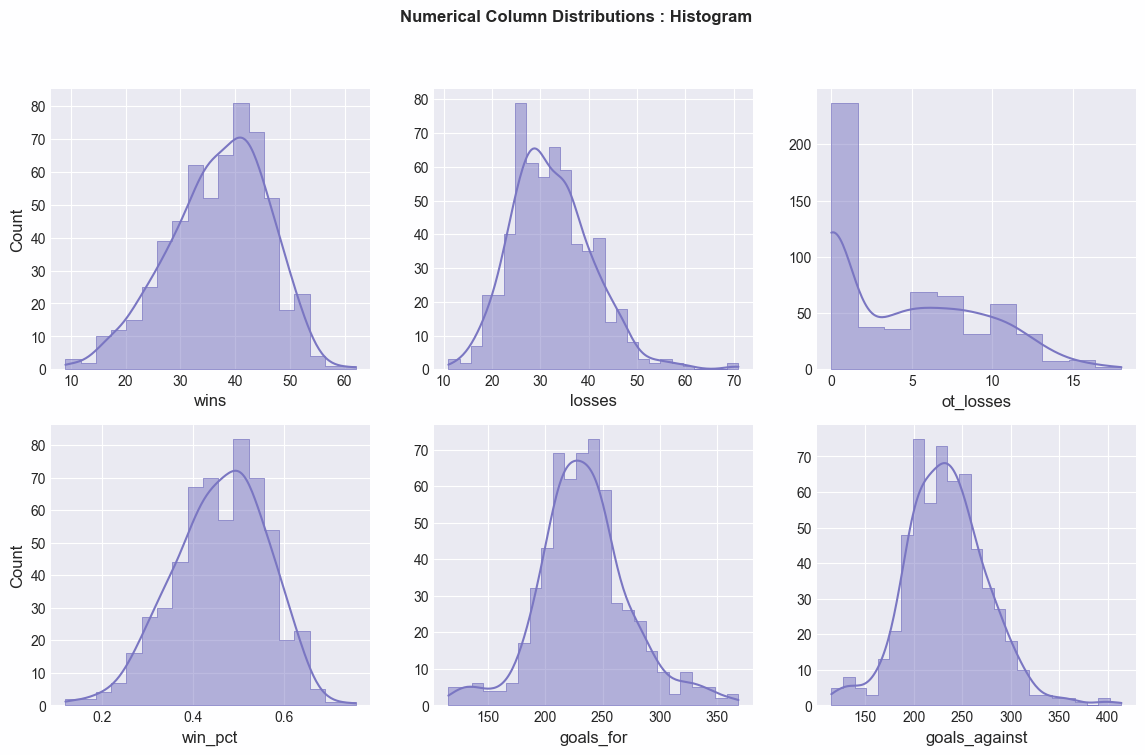

In [70]:
# Set a custom style for the plot
plt.style.use("../conf/pitayasmoothie-light.mplstyle")

# Select numerical columns in the DataFrame
numerical_cols = hockey_df.select_dtypes(include=['int', 'float']).columns.to_list()

# Create a new figure with a specified size
fig = plt.figure(figsize=(14, 8))

# Iterate over numerical columns for subplots
for idx, col in enumerate(numerical_cols):
    # Add a subplot to the figure
    ax = fig.add_subplot(2, 3, idx+1)
    
    # Create a histogram using Seaborn for the current column
    sns.histplot(data=hockey_df, x=col, ax=ax, element="step", kde="True")
    
    # Set the y-axis label for the first and fourth subplots
    if (idx+1) == 1 or (idx+1) == 4:
        ax.set_ylabel("Count")
    else:
        ax.set_ylabel("")  # Clear the y-axis label for other subplots
        
# Add a title to the entire figure
fig.suptitle(f"Numerical Column Distributions : Histogram", fontweight="bold")

# Display the figure with subplots
plt.show()

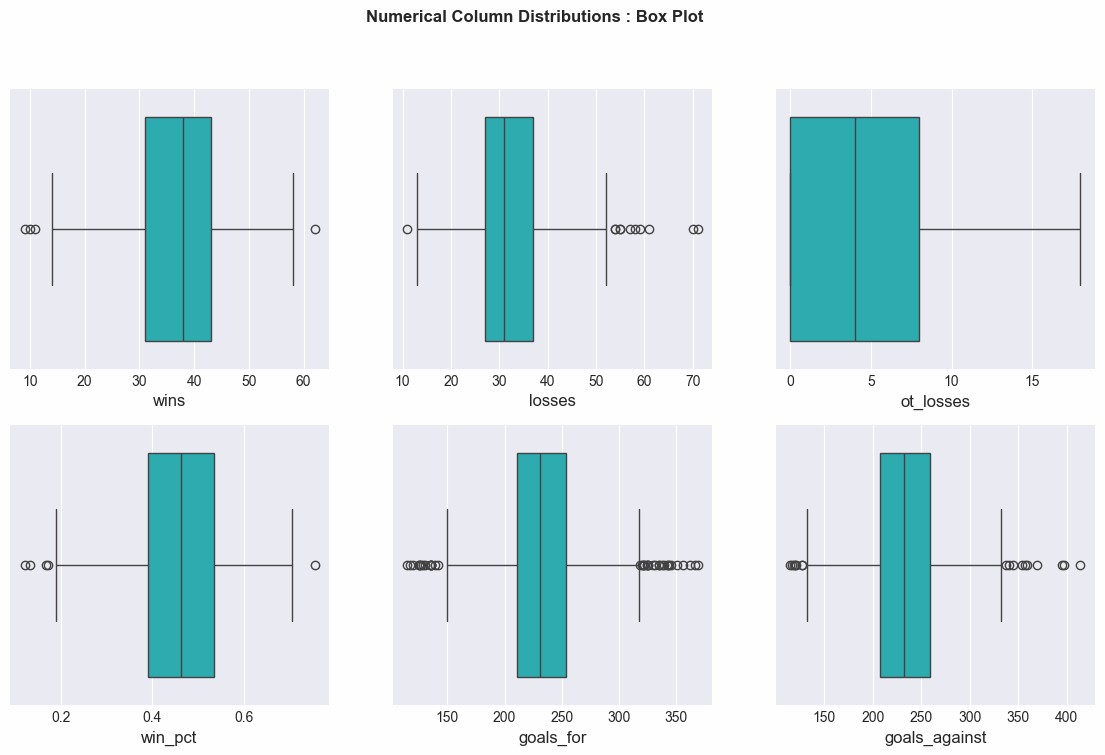

In [71]:
# Set a custom style for the plot
plt.style.use("../conf/pitayasmoothie-light.mplstyle")

# Select numerical columns in the DataFrame
numerical_cols = hockey_df.select_dtypes(include=['int', 'float']).columns.to_list()

# Create a new figure with a specified size
fig = plt.figure(figsize=(14, 8))

# Iterate over numerical columns for subplots
for idx, col in enumerate(numerical_cols):
    # Add a subplot to the figure
    ax = fig.add_subplot(2, 3, idx+1)
    
    # Create a histogram using Seaborn for the current column
    sns.boxplot(data=hockey_df, x=col, color="#18c0c4" ,ax=ax)
    ax.set_ylabel("")  # Clear the y-axis label for other subplots
        
# Add a title to the entire figure
fig.suptitle(f"Numerical Column Distributions : Box Plot", fontweight="bold")

# Display the figure with subplots
plt.show()

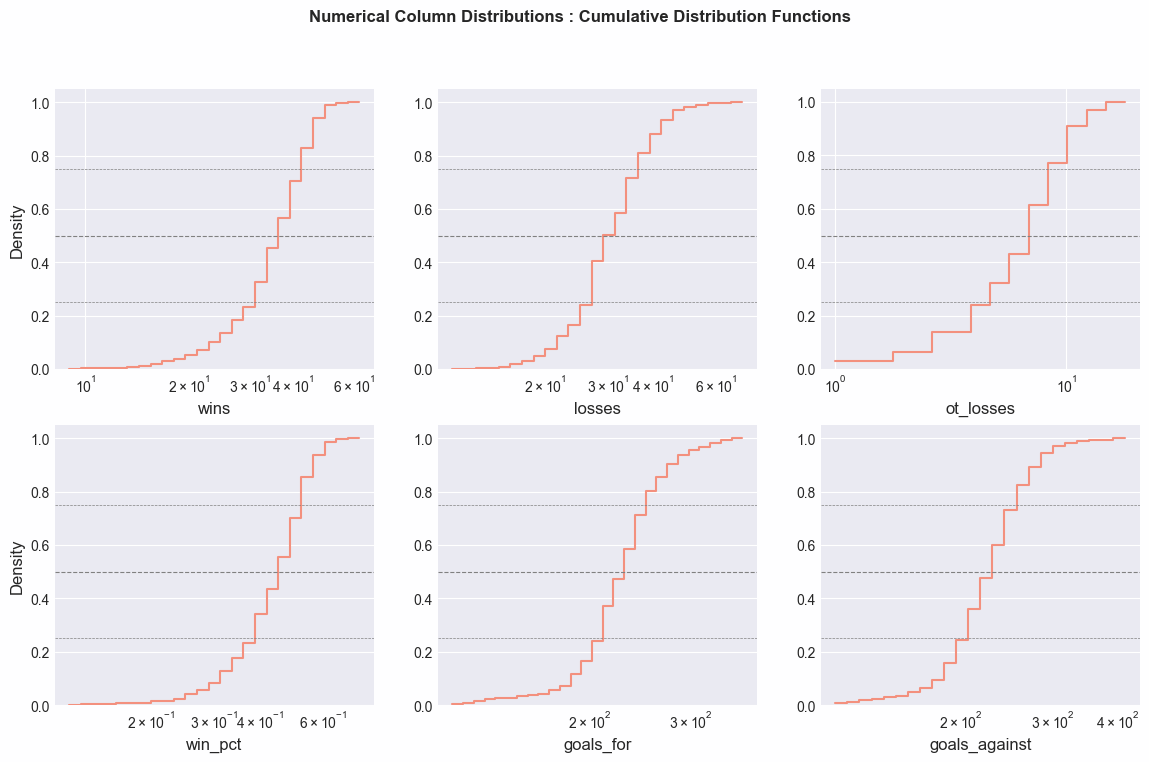

In [72]:
# Set a custom style for the plot
plt.style.use("../conf/pitayasmoothie-light.mplstyle")

# Select numerical columns in the DataFrame
numerical_cols = hockey_df.select_dtypes(include=['int', 'float']).columns.to_list()

# Create a new figure with a specified size
fig = plt.figure(figsize=(14, 8))

# Iterate over numerical columns for subplots
for idx, col in enumerate(numerical_cols):
    # Add a subplot to the figure
    ax = fig.add_subplot(2, 3, idx+1)
    
    # Create a histogram using Seaborn for the current column
    sns.histplot(data=hockey_df, x=col, ax=ax, element="step", log_scale=True, fill=False,
    cumulative=True, stat="density", common_norm=False, color="#f3907e")
    ax.axhline(y=0.25, color="grey", linestyle="--", linewidth=0.5)
    ax.axhline(y=0.5, color="grey", linestyle="--", linewidth=0.8)
    ax.axhline(y=0.75, color="grey", linestyle="--", linewidth=0.5)
    # Set the y-axis label for the first and fourth subplots
    if (idx+1) == 1 or (idx+1) == 4:
        ax.set_ylabel("Density")
    else:
        ax.set_ylabel("")  # Clear the y-axis label for other subplots
        
# Add a title to the entire figure
fig.suptitle(f"Numerical Column Distributions : Cumulative Distribution Functions", fontweight="bold")

# Display the figure with subplots
plt.show()

💡 **Insight:**



### Text Data Summary Statistics

In this we will be finding the following summary statistics for the text fields present in the dataframe. We'll get the following details for the text fields present in the dataframe:

- `count`: Count of non-null values
- `unique_values`: Count of unique values
- `longest_value`: The longest (length) value in the data
- `shortest_value`: The shortest (length) value in the data
- `max_value_count`: Number of values equal to the maximum length value
- `min_value_count`: Number of values equal to the minimum length value

We'll leverage the `describe_object_fields()` utility function that uses various `pandas` function to calculate all of these.

In [75]:
diu.describe_object_fields(hockey_df)

,count,unique_values,longest_values,average_length_value,shortest_value,max_value_count,min_value_count
column,,,,,,,
team_name,582,35,23,16.72337,12,12,18
year,582,21,4,4.00000,4,582,582


💡 **Insight:**

In [81]:
# create filter mask
filter_mask = (hockey_df['team_name'].str.len() == 23) | (hockey_df['team_name'].str.len() == 12)

# filter dataframe
list(hockey_df[filter_mask]["team_name"].unique())

['Mighty Ducks of Anaheim', 'Dallas Stars']

💡 **Insight:**


## Data Relationships Analysis

In this section, we will examine the relationships between different columns in the dataset. This can include identifying correlation, co-occurrence, or mutual information. 

The goal of this analysis is to understand how the columns in the dataset are related to each other and to identify any potential issues that need to be addressed before further analysis. We can leverage visualization tools such as heatmaps, scatter plots and correlation matrix to achieve this.

Given that there are only two numerical fields, plotting a correlation matrix would not provide much insight. Instead, we will conduct the following analysis:

- **Correlation Analysis**: To examine the linear relationship between the two fields.
- **Bivariate Analysis**: To study the relationship between each pair of variables in the dataset and to identify any significant patterns or trends between them.

### Correlation Analysis

In this section, we will be performing a correlation analysis to find the relationship between the numerical fields in the data. We have to create a correlation matrix to view the correlation between the numerical fields.

The correlation coefficient will be represented as a value between $-1$ and $1$, where $-1$ indicates a strong negative correlation, $1$ indicates a strong positive correlation, and $0$ indicates no correlation.

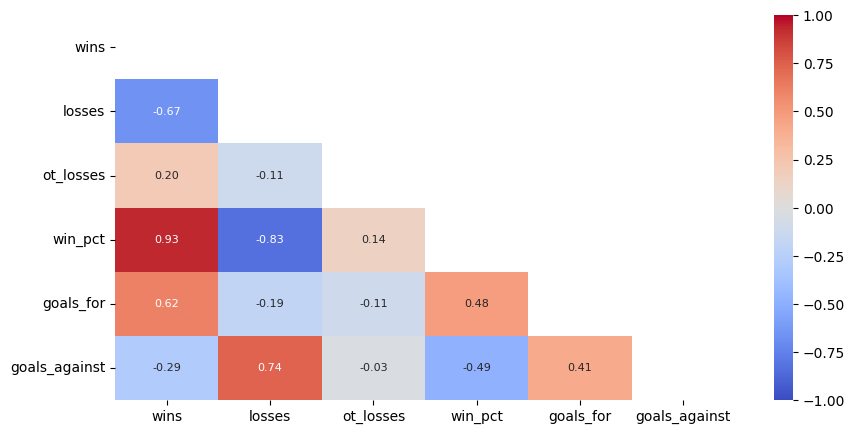

In [86]:
# Set a custom style for the plot
plt.style.use("default")

# Create correlation matrix for features
corr_matrix = hockey_df.select_dtypes(include=['int', 'float']).corr()

# visualize correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', 
            vmin=-1, vmax=1, 
            annot_kws={"size": 8, "ha": 'center',"va": 'center'}, fmt='.2f', 
            mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))

# show plot
plt.show()

💡 **Insight:**


It's important to note that correlation does not necessarily imply causation. A weak correlation between two variables simply indicates that they tend to change together to some degree, it does not indicate that one variable causes the other. We need to visualize the data to get a better understand the relationship between the fields.

### Bivariate Analysis

In this section, we will be creating scatter plots to visualize the relationship between different features in the dataset.

By plotting the features against one another, we can gain insight into the correlation between them and identify any patterns or trends that may exist. This can help us understand the underlying structure of the data and inform our next steps in the data analysis process. Additionally, this can also help identify any potential outliers or anomalies in the data that may require further investigation.

We only have $2$ numerical features in our dataset and earlier we have found that there is no linear relationship between the `price` and `rating`. Let's visualize the bivariate distribution between the two

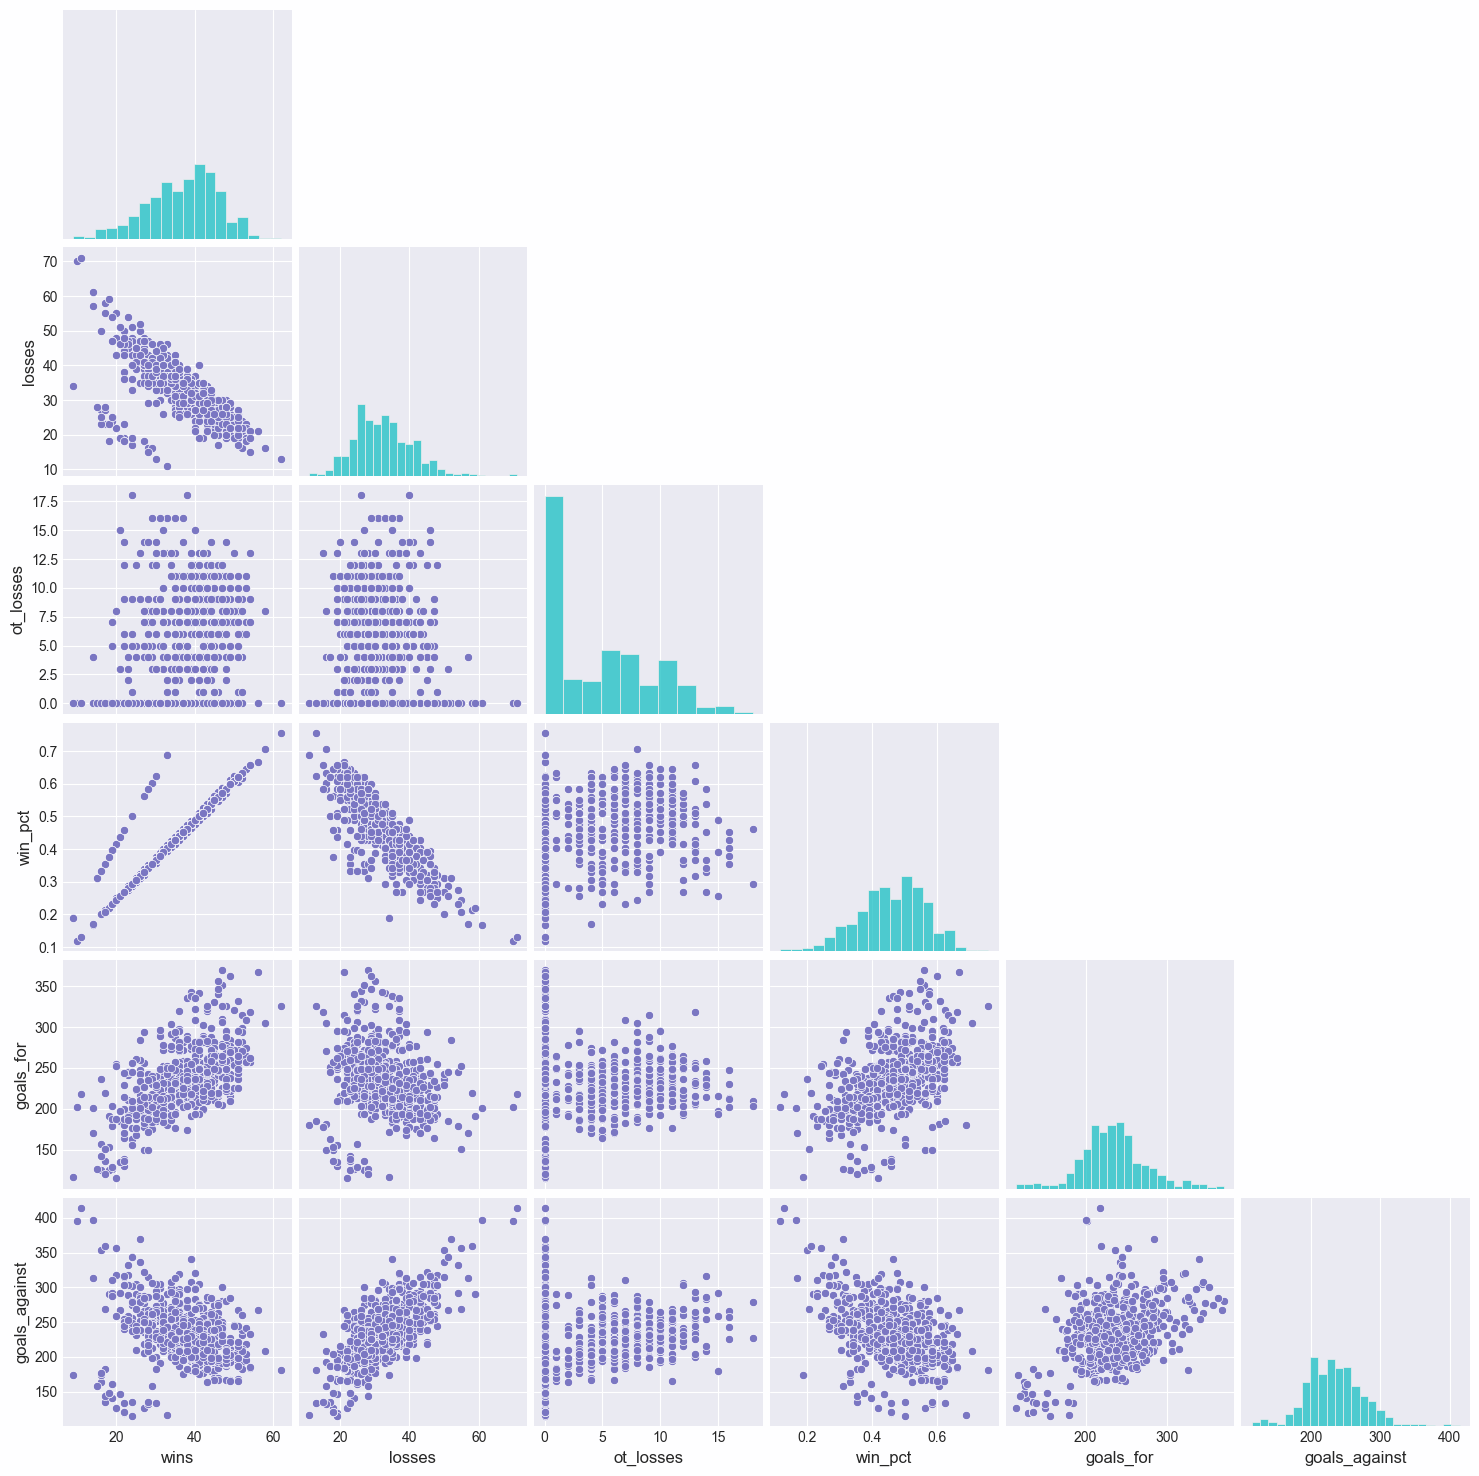

In [102]:
# Set a custom style for the plot
plt.style.use("../conf/pitayasmoothie-light.mplstyle")

# temporary dataframe copy for visualization
num_cols = hockey_df.select_dtypes(include=['int', 'float']).columns

sns.pairplot(hockey_df,
            vars=num_cols,
            corner=True,
            kind="scatter",
            diag_kind="hist",
            markers="o",
            plot_kws={"color": "#7a76c2"}, 
            diag_kws={"color": "#18c0c4"}
            )

plt.show()

💡 **Insight:**


## Conclusion

In this data analysis project, we have gone through a series of data analysis techniques and visualizations to gain a deeper understanding of the patterns in the book market with regards to genres, ratings, prices, and more. We have analyzed individual fields and their relationships with other fields to gain a comprehensive understanding of the data and documented the insights we gained from each analysis.

Our next step would be to create an interactive data visualization using Power BI to provide a user-friendly and intuitive interface for exploring the insights from our analysis. With Power BI, we can create interactive dashboards and reports that can help us present the insights and patterns in the data in a clear and effective manner. This will allow us to present the findings in a visually appealing way, making it easier for stakeholders to understand and make informed decisions based on our analysis.